In [66]:
# Imports
import os
import getpass

import numpy

import nipype
import nibabel
from nilearn.plotting import plot_roi
from nilearn import image
from nipype.interfaces.io import BIDSDataGrabber
from bids.layout import BIDSLayout

from matplotlib import pyplot as plt

In [21]:
user = getpass.getuser()

if user == 'ari':
    bids_ds_path = '/Volumes/SSD-Bercows/Joan/research/0_data/Sample_Multi-Modal_BIDS_dataset/ds-sample/'

if user == 'andres':
    bids_ds_path = '/home/andres/Desktop/BIDS/Datos/ds-sample'
    deriv_dir = 


In [22]:
if user == 'ari':
    !tree -L 4 /Volumes/SSD-Bercows/Joan/research/0_data/Sample_Multi-Modal_BIDS_dataset/ds-sample/

if user == 'andres':
    !tree -L 4 /home/andres/Desktop/BIDS/Datos/ds-sample

/home/andres/Desktop/BIDS/Datos/ds-sample
├── CHANGES
├── code
│   ├── license.txt
│   ├── ref_anatomical_config.ini
│   ├── ref_anatomical_config.json
│   ├── ref_diffusion_config.ini
│   ├── ref_diffusion_config.json
│   ├── ref_fMRI_config.ini
│   └── ref_fMRI_config.json
├── dataset_description.json
├── derivatives
│   ├── cmp
│   │   ├── dataset_description.json
│   │   └── sub-01
│   │       └── ses-01
│   ├── freesurfer
│   │   ├── dataset_description.json
│   │   ├── fsaverage
│   │   │   ├── label
│   │   │   ├── mri
│   │   │   ├── mri.2mm
│   │   │   ├── scripts
│   │   │   ├── surf
│   │   │   └── xhemi
│   │   └── sub-01_ses-01
│   │       ├── label
│   │       ├── mri
│   │       ├── scripts
│   │       ├── stats
│   │       ├── surf
│   │       ├── tmp
│   │       ├── touch
│   │       └── trash
│   └── nipype
│       ├── dataset_description.json
│       └── sub-01
│           └── ses-01
├── participants.tsv
├── README
└── sub-01
    └── ses-01
        ├── anat
        │

In [55]:
layout = BIDSLayout(bids_ds_path)

In [56]:
layout.get_subjects()

['01']

In [57]:
layout.get_modalities()

[]

In [63]:
t1w_path = layout.get(datatype="anat", suffix="T1w", subject='01', return_type="file", extension=["nii", "nii.gz"])
roi_path = "/home/andres/Desktop/BIDS/Datos/ds-sample/derivatives/cmp/sub-01/ses-01/anat/sub-01_ses-01_label-L2018_desc-scale1_atlas.nii.gz"

In [59]:
layout.add_derivatives("/home/andres/Desktop/BIDS/Datos/ds-sample/derivatives/cmp")

In [60]:
t1w_image = nibabel.load(t1w_path[0])

In [64]:
roi_image = nibabel.load(roi_path)

/home/andres/.local/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


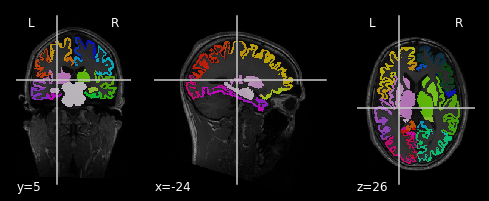

In [67]:
fig = plot_roi(roi_image, t1w_image)

In [68]:
fig.savefig('/home/andres/Desktop/overlay_t1w_L2008_scale1.png')